# Loading the data

In [572]:
import pandas as pd
import seaborn as sns

In [318]:
csv_files = !ls datastatic/datasets/online/*csv

In [319]:
data = {}

for file in csv_files:
    data[file] = pd.read_csv(file)


# Comparing  countries

In [293]:
countries = {}

for file in csv_files:
    d = data[file]
    
    # Get SDG if exist
    try:
        sdg = int(d.ix[2,1])
    except:
        sdg = d.ix[2,1]

    # Get SDG Name
    sdg_name = d.ix[1,1]
    
    # Get Name of the index,
    index_name = d.ix[1][1]
    # the target value...
    target = d.ix[13,1]
    # ...and its range
    target_range = d.ix[14,1]

    # Get the values for each contry
    for _, row in d[36:].iterrows():
        try:
            country_name = row[0].strip()
        except:
            pass
        
        if not country_name in countries:
            countries[country_name] = []
            
        # Finally get the value of the index for a specific country
        index_value = row[1]    
        countries[country_name] += [(country_name, sdg_name, sdg, target, target_range, index_name, index_value)]
        
for country, c_data in countries.items():
    countries[country] = pd.DataFrame(c_data, columns=['country', 'sdg_name', 'sdg', 'target', 'range', 'name', 'value'])

In [295]:
countries_df = pd.concat(countries.values())

In [391]:
def get_sdg_countries(countries=['Germany'], sdg=10):
    df = []
    
    for country in countries:
        
        df_c = countries_df[(countries_df.country == country) & (countries_df.sdg == sdg)] 
        if not df_c.empty:
            df += [df_c]
        else:
            return

    ranges = countries_df[(countries_df.country == countries[0]) & (countries_df.sdg == sdg)]['range']
    rf = []

    for r in ranges:
        def mf(r):
            def f(x):
                r0 = float(r.split(',')[0].strip())
                rmax = float(r.split(',')[-1].strip())
                rlen = r0 - rmax
                return 1 - (r0 - x)/rlen
            return f
        f = mf(r)
        rf += [f]
        
    data = {}
    
    for ci, c in enumerate(countries):
        data[c] = []
        for i, f in enumerate(rf):
            data[c] += [(df[ci].iloc[i]['name'], f(float(df[ci].iloc[i]['value'])))]

    sdg_name = countries_df[countries_df.sdg == sdg].iloc[0]['sdg_name']

    return (sdg_name, data)

In [303]:
sdg_name, countries_data = get_sdg_countries(countries=['Germany', 'Italy', 'France', 'Sweden'])

In [311]:
def plot_countries(countries_data, sdg_name=""):
    countries = pd.concat([pd.DataFrame(c).loc[:,1] for c in countries_data.values()], axis=1)
    countries.columns = countries_data.keys()
    labels =  [c[0] for c in list(countries_data.items())[0][1]]
    ax = countries.plot.barh()
    ax.set_yticklabels(labels)
    if sdg_name:
        ax.set_title(sdg_name)
    plt.axvline(1, color='k')
    plt.axvline(0, color='k')
    
def plot_sdg(countries=['Germany'], sdg=10):
    sdg_name, countries_data = get_sdg_countries(countries=countries, sdg=sdg)
    plot_countries(countries_data, sdg_name)

# Comparing countries in each different SDG

Problems at 6
Problems at 9
Problems at 15
Problems at 16


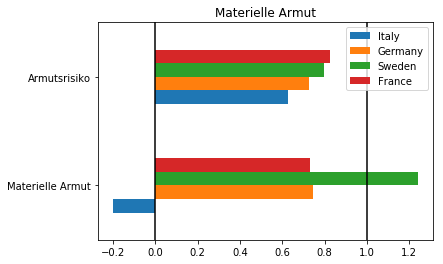

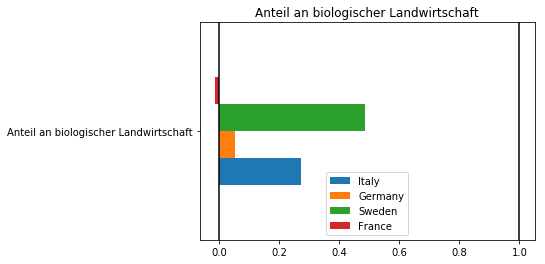

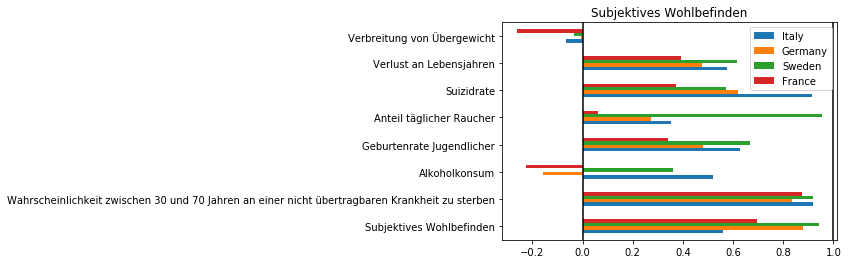

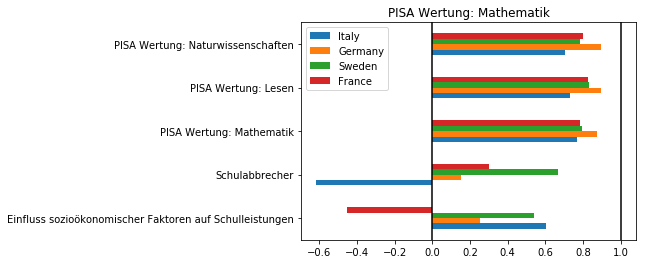

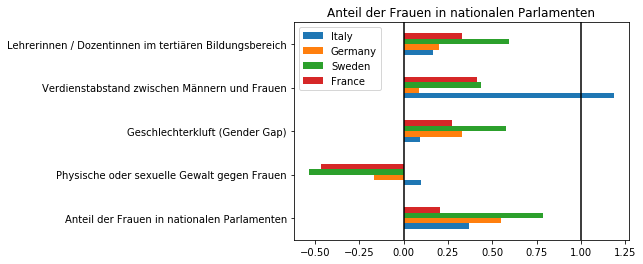

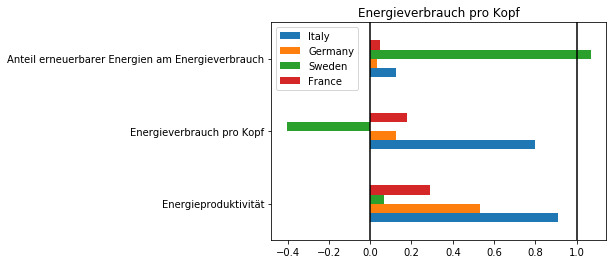

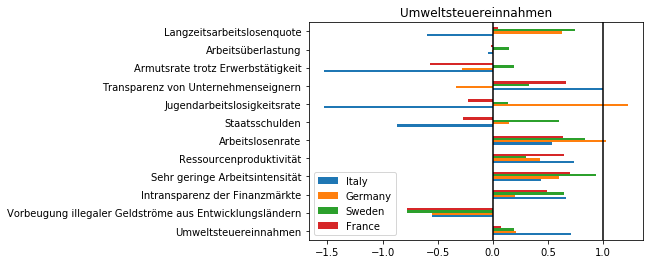

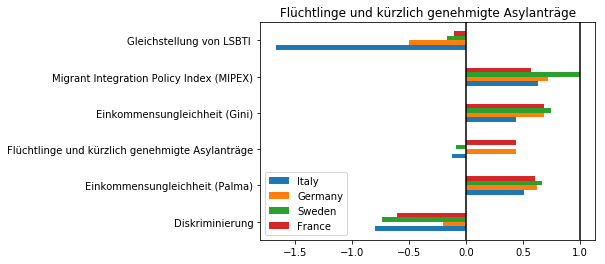

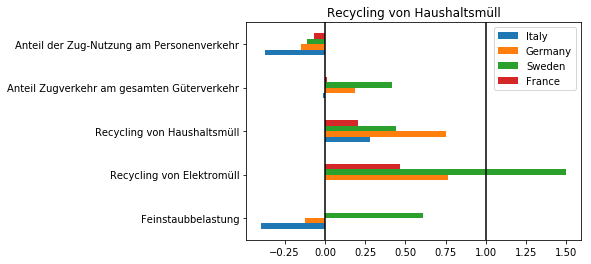

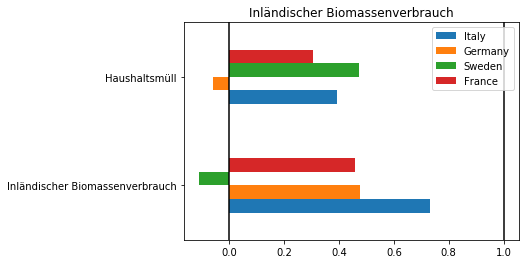

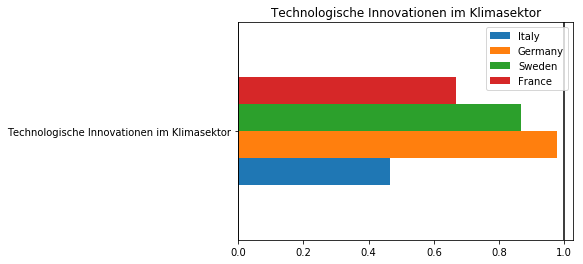

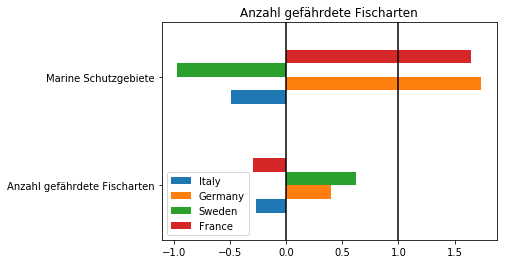

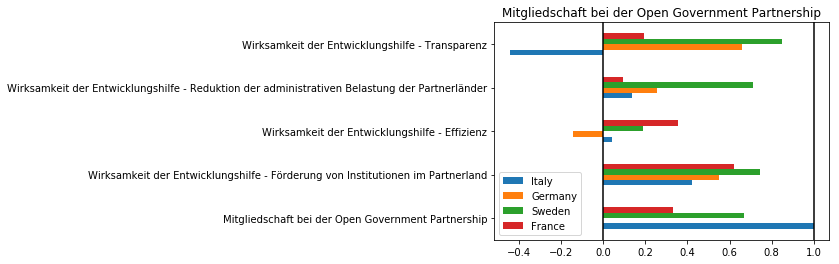

In [329]:
for i in range(1,18):
    try:
        plot_sdg(countries=['Germany', 'Italy', 'France', 'Sweden'], sdg=i)
    except:
        print("Problems at {}".format(i))

In [524]:
cds = []

for c in ["Germany", "France", "Italy", "Sweden", "Portugal", "Spain"]:
    r = []
    for s in range(1,18):
        sdg_data = get_sdg_countries(countries=[c], sdg=s)
        if sdg_data:
            r += [sdg_data]
    cds += [pd.DataFrame([d[1] for ri in r for d in ri[1][c]])]

In [528]:
comp = pd.concat(cds, axis=1)
comp.columns = ['De', 'Fr', 'It', 'Sw', 'Pt', 'Sp']

# Comparing France and Germany in all indicators

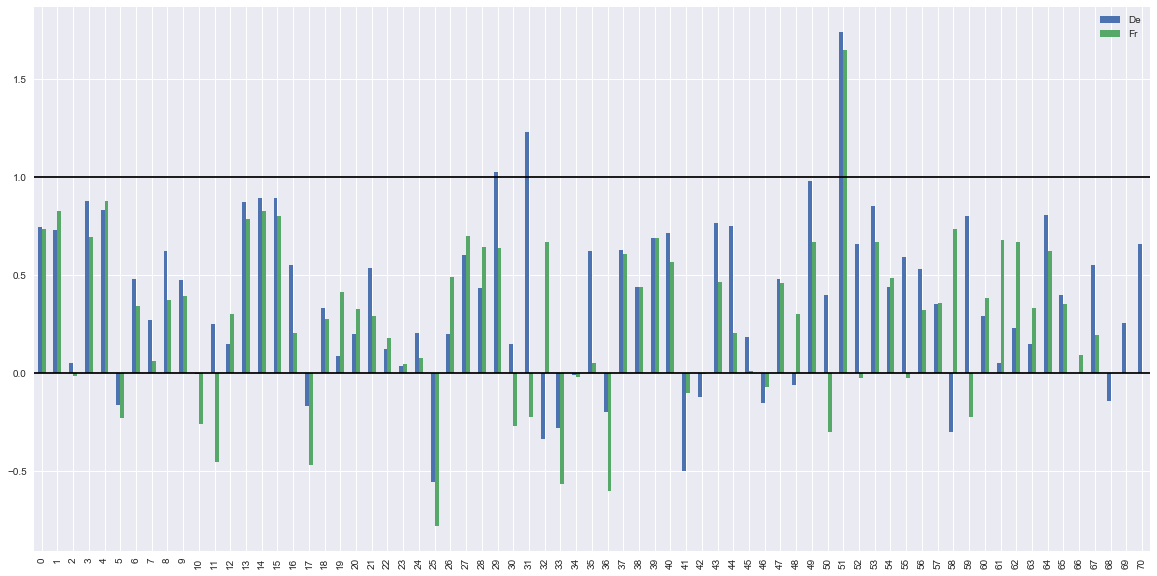

In [553]:
ax = comp.iloc[:, 0:2].plot.bar(figsize=(20,10))
plt.axhline(1, color='k')
plt.axhline(0, color='k')

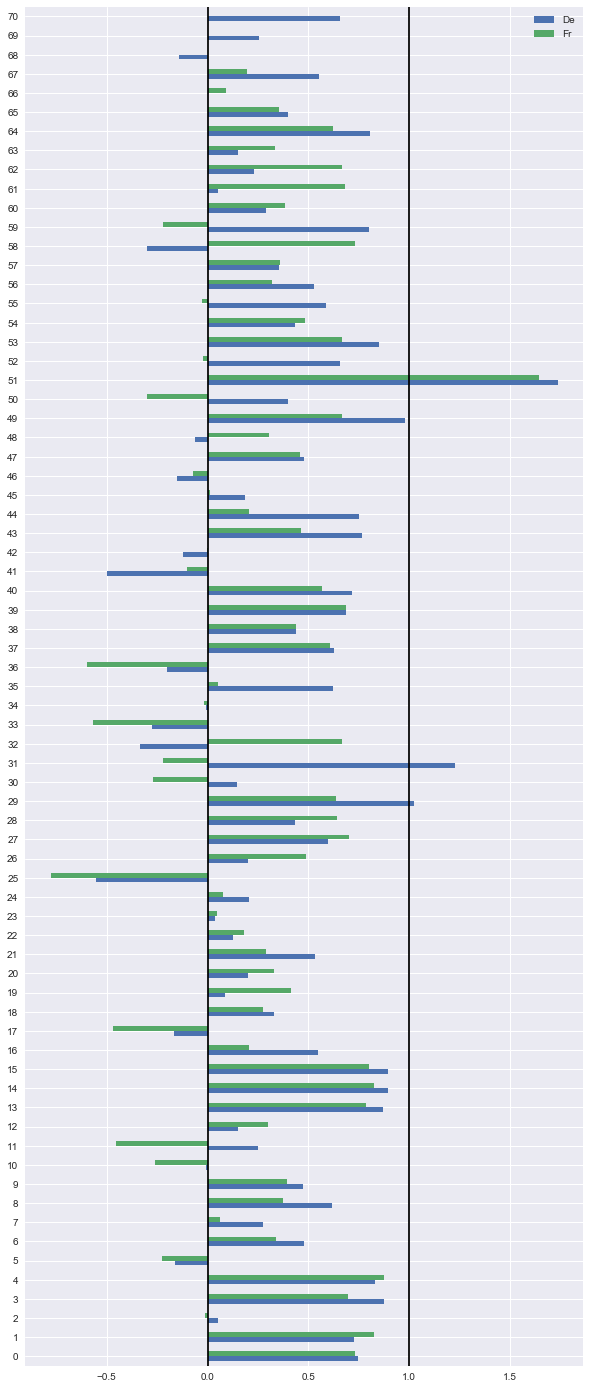

In [554]:
ax = comp.iloc[:,0:2].plot.barh(figsize=(10,25))
plt.axvline(1, color='k')
plt.axvline(0, color='k')

# Looking at the Germany indicators sorted by value

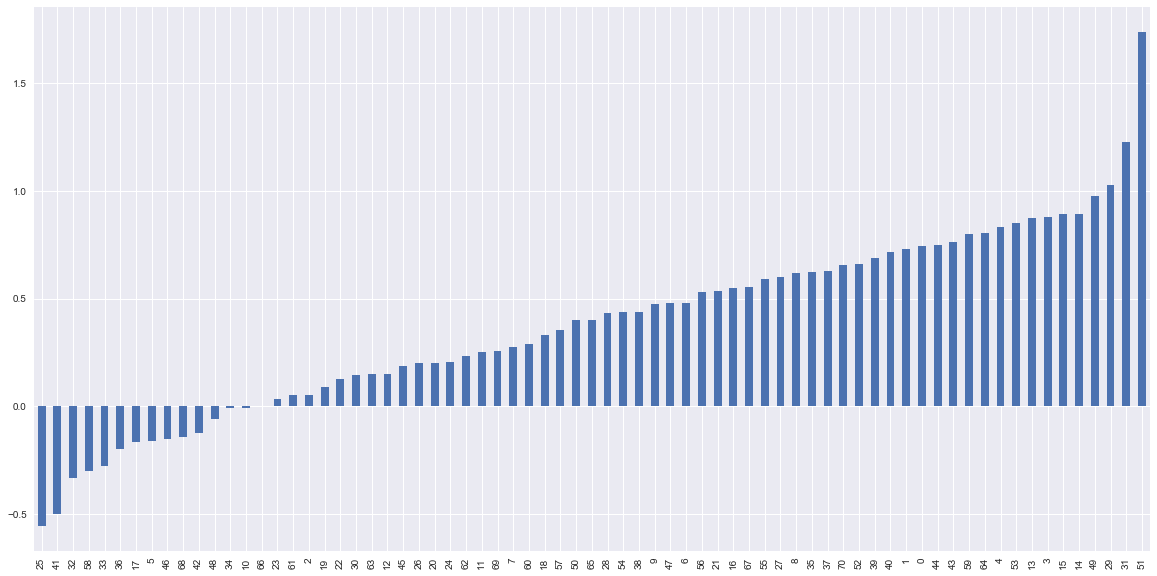

In [579]:
ax = comp.iloc[:,0].sort_values().plot.bar(figsize=(20,10))
#comp.iloc[:,2].sort_values().plot.bar(ax=ax)

# Looking at the France indicators sorted by value

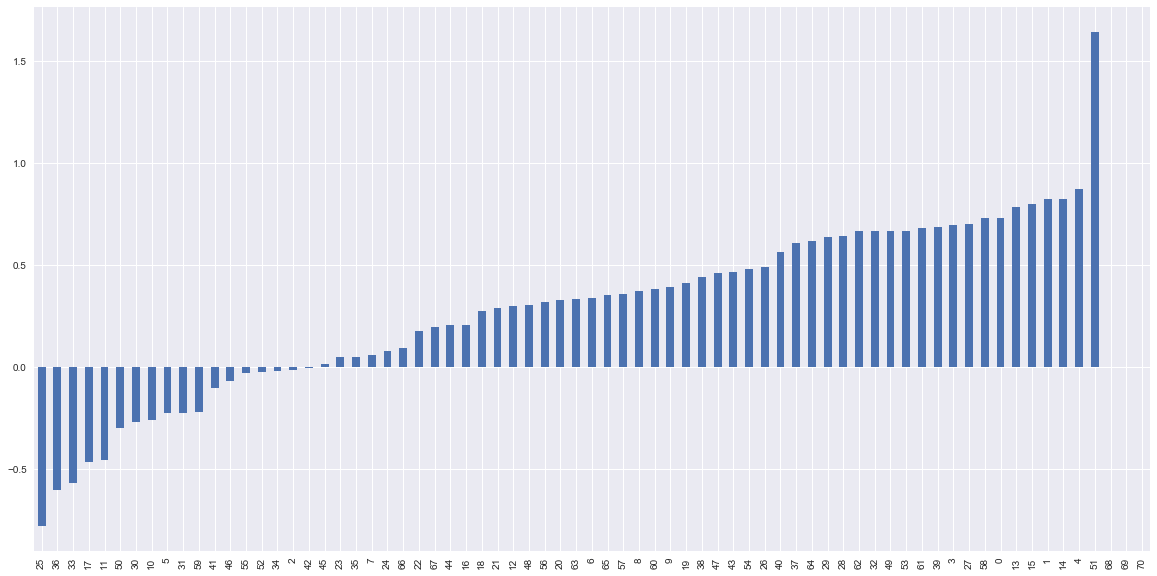

In [580]:
ax = comp.iloc[:,1].sort_values().plot.bar(figsize=(20,10))

# Now we plot both for better comparing

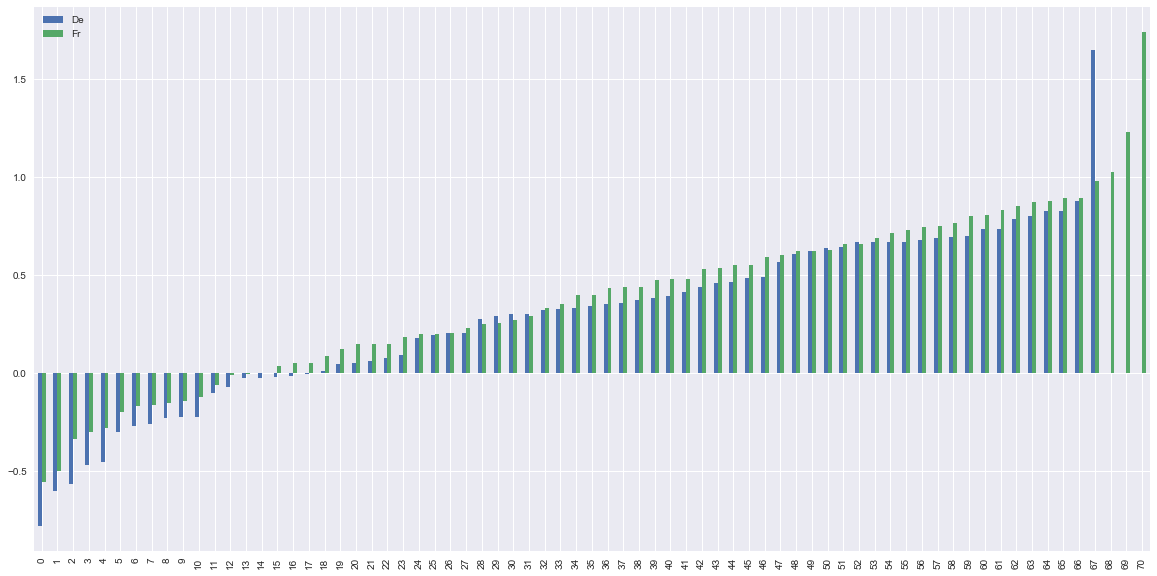

In [586]:
de_sorted = comp.iloc[:,1].sort_values()
de_sorted.index = range(len(de_sorted))
fr_sorted = comp.iloc[:,0].sort_values()
fr_sorted.index = range(len(fr_sorted))
comp_de_fr = pd.concat([de_sorted, fr_sorted], axis=1)
comp_de_fr.columns = ['De', 'Fr']
comp_de_fr.plot.bar(figsize=(20,10))

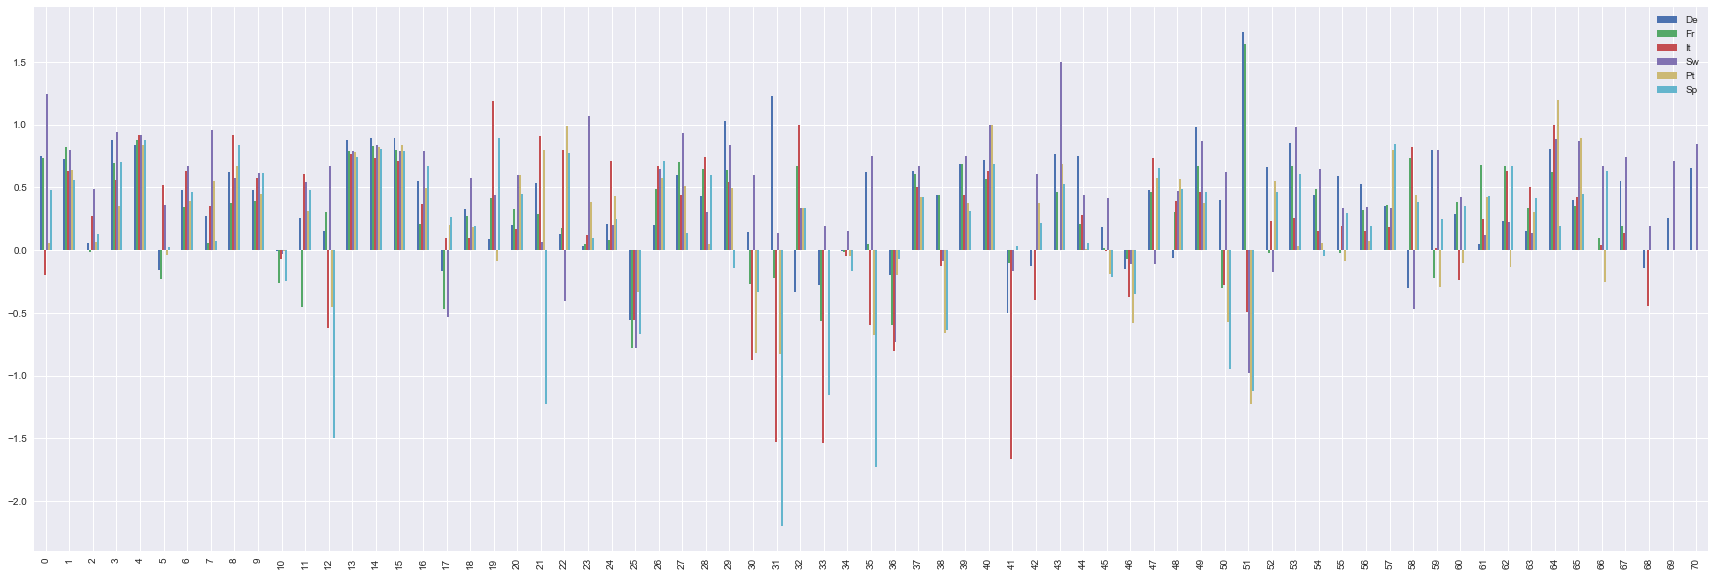

In [587]:
comp.plot.bar(figsize=(30,10))

/home/walrus/.virtualenvs/py3/lib/python3.5/site-packages/seaborn/categorical.py:2342: UserWarning: The violinplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


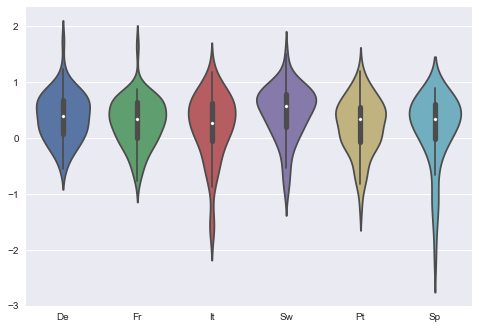

In [571]:
sns.violinplot(comp)

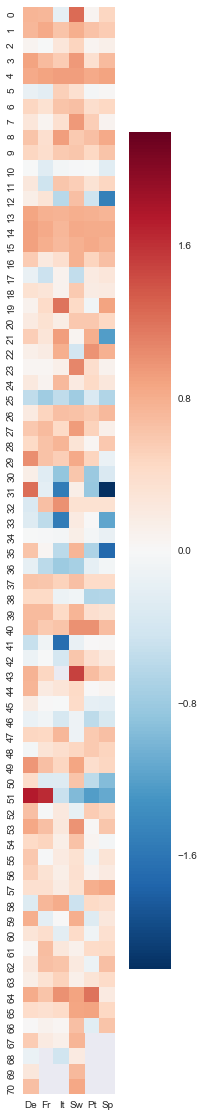

In [548]:
plt.figure(figsize=(5,20))
sns.heatmap(comp, square=True)
